# 패키지 설치

In [4]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [806 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,512 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu

In [5]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [6]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading 

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2617k      0 --:--:-- --:--:-- --:--:-- 14.4M
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [7]:
!pip install gensim
# !pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. 데이터 준비

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [9]:
import pandas as pd
import konlpy
import gensim

print(pd.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.5
0.6.0
3.6.0


In [10]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tqdm import tqdm_notebook

import tensorflow as tf

In [11]:
!ls '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강'

best  ckp  data  ex1.ipynb  ex2.ipynb  project9.ipynb  Untitled0.ipynb


In [12]:
data_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강/data'
train_data_path = os.path.join(data_dir, "ratings_train.txt")
test_data_path = os.path.join(data_dir, "ratings_test.txt")

train_data = pd.read_table(train_data_path)
test_data = pd.read_table(test_data_path)

In [13]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [14]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


- 이번에 사용할 데이터셋은 id, 댓글, 긍정/부정 label로 구성되어 있음.
- 긍정의 경우 1, 부정의 경우 0.
- 데이터가 csv 파일이 아니라 space separated 된 txt 데이터이기 때문에 pd.read_tabel 함수를 이용하여 데이터를 로딩함.

# 2. Dataloader 함수 생성
- 데이터의 중복 제거
- NaN 결측치 제거
- 한국어 토크나이저로 토큰화
- 불용어(Stopwords) 제거
- 사전word_to_index 구성
- 텍스트 스트링을 사전 인덱스 스트링으로 변환
- X_train, y_train, X_test, y_test, word_to_index 리턴

In [15]:
from konlpy.tag import Mecab
from collections import Counter

In [16]:
def IMDB_data_loader(train_data, test_data, num_words=10000):
    # konlpy 패키지의 Mecab 한국어 토크나이저 사용
    tokenizer = Mecab()
    # 한국어 불용어 설정
    stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

    # 중복 데이터 및 결측치 제거
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how='any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how='any') 

    x_train = []
    for sentence in tqdm_notebook(train_data['document']):
        # 토크나이저 함수 옵션
        # 참고 자료 : https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html
        # nouns : 명사 추출
        # morphs : 형태소 추출
        # pos : 품사 부착
        temp_x = tokenizer.morphs(sentence) # 형태소 추출 방식으로 토큰화 진행
        temp_x = [word for word in temp_x if not word in stopwords] # 불용어 처리
        x_train.append(temp_x)

    x_test = []
    for sentence in tqdm_notebook(test_data['document']):
        temp_x = tokenizer.morphs(sentence) # 형태소 추출 방식으로 토큰화 진행
        temp_x = [word for word in temp_x if not word in stopwords] # 불용어 처리
        x_test.append(temp_x)

    # x_train 데이터는 각 문장에 대한 토큰들의 리스트로 2차원 배열([문장 번호, 문장 내부 토큰]인데 concatenate 함수를 사용하면 1차원으로 변환됨.
    # 단어장을 만들 때 x_train 및 x_test 모두에 있는 단어를 고려하는게 좋을까?
    # 단어장에 x_test를 포함시켜봤자 학습 과정에 반영되지 않기 때문에 필요없음.
    words = np.concatenate(x_train).tolist()

    # 고유 단어들의 개수를 카운트
    counter = Counter(words)
    # 가장 빈도수가 높은 단어 순으로 (단어, 빈도수)튜플을 반환
    counter = counter.most_common(num_words-3)

    # 단어장 생성 / '<PAD>', '<BOS>', '<UNK>' 추가를 위해 단어장 개수에서 3개를 빼놨음
    vocab = ['<PAD>', '<BOS>', '<UNK>'] + [key for key, _ in counter]

    # 단어장과 인덱스 쌍의 딕셔너리 생성
    word_to_index = {word:index for index, word in enumerate(vocab)}

    # word to index 변환 함수 선언
    # 문장의 시작에는 <BOS> 추가 / 단어 매칭될 경우 인덱스 반환 / 단어 매칭 안될경우 <UNK>의 인덱스 반환 
    def convert_word_to_index(words):
        return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in words]

    # train/test 데이터셋 word to index 변환
    x_train = list(map(convert_word_to_index, x_train))
    x_test = list(map(convert_word_to_index, x_test))

    # 단어장의 인덱스로 변환된 인덱스 리스트 데이터와 호/불호 데이터 쌍을 반환, word2index 형태의 단어장을 반환
    return x_train, np.array(list(train_data['label'])), x_test, np.array(list(test_data['label'])), word_to_index

In [17]:
vocab_size = 10000
x_train, y_train, x_test, y_test, word_to_index = IMDB_data_loader(train_data, test_data, num_words=vocab_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/146182 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/49157 [00:00<?, ?it/s]

# train/valid 데이터셋 분리

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.3)

- 데이터셋 분리 비율은 7:3

# 3. 데이터 분석 및 가공

In [19]:
def show_sentence_len(data):
    sentence_len_cnt = []
    for sen in data:
        sentence_len_cnt.append(len(sen))

    # 문장 길이의 유니크 알아내기
    columns = np.unique(np.array(sentence_len_cnt))
    columns

    # 문장 길이 데이터프레임 생성
    # 데이터 입력 부분에 [] 넣어줘야 데이터가 가로로 들어감
    sentence_len_df = pd.DataFrame(data=[np.zeros_like(columns)], columns=columns)

    # 데이터 추가
    for sen in tqdm_notebook(data):
        sen_len = len(sen)
        sentence_len_df[sen_len] += 1

    # 빈 데이터프레임 생성
    a = pd.DataFrame(data=[np.zeros_like(columns)], columns=columns)
    sentence_len_df = pd.concat([sentence_len_df, a], axis=0)
    # sentence_len_df

    # 문장 길이 누적 데이터 추가
    cnt = 0
    for i in range(len(columns)):
        sentence_len_df.iloc[1, i] = sentence_len_df.iloc[0, i] + cnt
        cnt = sentence_len_df.iloc[1, i]
    # sentence_len_df

    # 백분율로 변경
    sentence_len_percent = sentence_len_df.iloc[1, :].apply(lambda x: 100 * x / sentence_len_df.iloc[1, -1])

    # 그래프 생성
    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax2 = ax1.twinx()

    c1 = sns.histplot(ax = ax1, data = sentence_len_cnt, bins=50, color = 'm')
    c2 = sns.lineplot(ax = ax2, data = sentence_len_percent, color = 'blue')

    plt.grid(True)

    ax1.set_ylabel('sentence length count')
    ax2.set_ylabel('percentage')

    ax1.set_xlabel("sentence length")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/102327 [00:00<?, ?it/s]

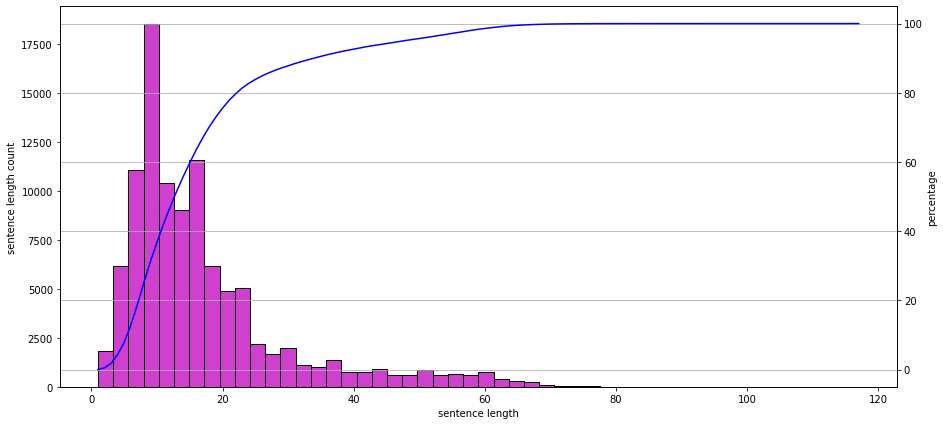

In [20]:
show_sentence_len(x_train)

- 학습 데이터셋의 경우 문장 최대 길이는 120 근처임.
- 문장 최대 길이를 24로 지정하면 데이터셋의 80% 이상을 활용할 수 있음.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/49157 [00:00<?, ?it/s]

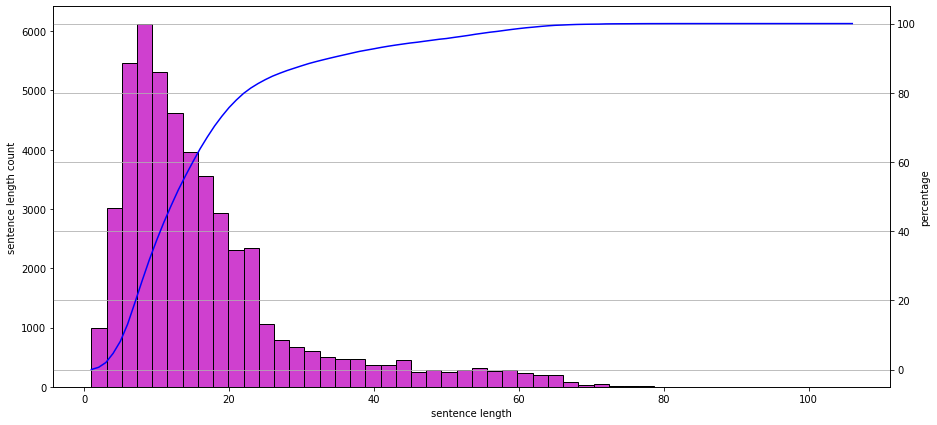

In [21]:
show_sentence_len(x_test)

- 별 의미는 없는데 테스트 셋에 대해서도 시각화해봤음.

In [22]:
# 문장의 길이가 maxlen에 미치지 못할 경우 뒤쪽에 0 padding을 추가(pre, post로 앞뒤 설정)
# 문장의 길이가 maxlen을 넘어설 경우 뒤쪽의 인덱스를 삭제(pre, post로 앞뒤 설정)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, padding='post', maxlen=24, truncating='post')
x_valid = tf.keras.preprocessing.sequence.pad_sequences(x_valid, padding='post', maxlen=24, truncating='post')
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, padding='post', maxlen=24, truncating='post')

- truncating 변수 반드시 사용할 것!

# 4. 모델 설정

## 모델1(LSTM RNN 모델)

In [23]:
model1_embed_size = 256
model1_hidden_size1 = 1024
model1_dense1 = 200
model1_dense2 = 100

In [24]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(vocab_size, model1_embed_size, input_shape=(None,)))
model1.add(tf.keras.layers.LSTM(model1_hidden_size1))
model1.add(tf.keras.layers.Dense(model1_dense1, activation='relu'))
model1.add(tf.keras.layers.Dense(model1_dense2, activation='relu'))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         2560000   
                                                                 
 lstm (LSTM)                 (None, 1024)              5246976   
                                                                 
 dense (Dense)               (None, 200)               205000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 8,032,177
Trainable params: 8,032,177
Non-trainable params: 0
_________________________________________________________________


## 모델2(1D convolution 모델)

In [25]:
model2_embed_size = 256
model2_dropout_ratio = 0.3
model2_num_filters = 512
model2_kernel_size = 7
model2_hidden_units1 = 200
model2_hidden_units2 = 20

In [26]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(vocab_size, model2_embed_size, input_shape=(None,)))
model2.add(tf.keras.layers.Dropout(model2_dropout_ratio))
model2.add(tf.keras.layers.Conv1D(model2_num_filters, model2_kernel_size, padding='valid', activation='relu'))
model2.add(tf.keras.layers.GlobalMaxPooling1D())
model2.add(tf.keras.layers.Dense(model2_hidden_units1, activation='relu'))
model2.add(tf.keras.layers.Dropout(model2_dropout_ratio))
model2.add(tf.keras.layers.Dense(model2_hidden_units2, activation='relu'))
model2.add(tf.keras.layers.Dropout(model2_dropout_ratio))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         2560000   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 512)         918016    
                                                                 
 global_max_pooling1d (Globa  (None, 512)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 200)               102600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                      

## 모델3(maxpooling 모델)

In [27]:
model3_embed_size = 256
model3_hidden_units1 = 100
model3_hidden_units2 = 10

In [28]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(vocab_size, model3_embed_size, input_shape=(None,)))
model3.add(tf.keras.layers.GlobalMaxPooling1D())
model3.add(tf.keras.layers.Dense(model3_hidden_units1, activation='relu'))
model3.add(tf.keras.layers.Dense(model3_hidden_units2, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 256)         2560000   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 100)               25700     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,586,721
Trainable params: 2,586,721
Non-trainable params: 0
____________________________________________

# 5. 모델 훈련

## 모델1

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [30]:
epochs = 20
batch_size = 512

In [31]:
model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [32]:
# history1 = model1.fit(x_train, 
#                       y_train, 
#                       epochs=epochs, 
#                       batch_size=batch_size, 
#                       validation_data=(x_valid, y_valid))

In [33]:
save_path = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강/ckp/model1_best.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(save_path, monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history1 = model1.fit(x_train, 
                      y_train, 
                      epochs=epochs, 
                      batch_size=batch_size, 
                      validation_data=(x_valid, y_valid), 
                      callbacks=[es, mc])

model1.save(save_path)

Epoch 1/20
200/200 [==============================] - 22s 76ms/step - loss: 0.4364 - accuracy: 0.7901 - val_loss: 0.3760 - val_accuracy: 0.8342
Epoch 2/20
200/200 [==============================] - 15s 74ms/step - loss: 0.3347 - accuracy: 0.8560 - val_loss: 0.3682 - val_accuracy: 0.8433
Epoch 3/20
200/200 [==============================] - 15s 74ms/step - loss: 0.2943 - accuracy: 0.8753 - val_loss: 0.3494 - val_accuracy: 0.8490
Epoch 4/20
200/200 [==============================] - 15s 74ms/step - loss: 0.2596 - accuracy: 0.8920 - val_loss: 0.3577 - val_accuracy: 0.8444
Epoch 5/20
200/200 [==============================] - 15s 75ms/step - loss: 0.2259 - accuracy: 0.9084 - val_loss: 0.3993 - val_accuracy: 0.8420
Epoch 6/20
200/200 [==============================] - 15s 75ms/step - loss: 0.1953 - accuracy: 0.9226 - val_loss: 0.4426 - val_accuracy: 0.8395
Epoch 6: early stopping


## 모델2

In [34]:
epochs = 20
batch_size = 512

In [35]:
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [36]:
# history2 = model2.fit(x_train, 
#                       y_train, 
#                       epochs=epochs, 
#                       batch_size=batch_size, 
#                       validation_data=(x_valid, y_valid))

In [37]:
best_save_path = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강/best/model2_best.h5'
ckp_save_path = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강/ckp/{epoch:02d}-{val_loss:.5f}.h5'

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(ckp_save_path, monitor='val_acc', mode='max', verbose=1, save_best_only=False)

history2 = model2.fit(x_train, 
                      y_train, 
                      epochs=epochs, 
                      batch_size=batch_size, 
                      validation_data=(x_valid, y_valid), 
                      callbacks=[es, mc])

model2.save(best_save_path)

Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 0.4446 - accuracy: 0.7843
Epoch 1: saving model to /gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강/ckp/01-0.35257.h5
200/200 [==============================] - 11s 16ms/step - loss: 0.4446 - accuracy: 0.7843 - val_loss: 0.3526 - val_accuracy: 0.8420
Epoch 2/20
200/200 [==============================] - ETA: 0s - loss: 0.3104 - accuracy: 0.8728
Epoch 2: saving model to /gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강/ckp/02-0.34713.h5
200/200 [==============================] - 3s 15ms/step - loss: 0.3104 - accuracy: 0.8728 - val_loss: 0.3471 - val_accuracy: 0.8487
Epoch 3/20
196/200 [============================>.] - ETA: 0s - loss: 0.2422 - accuracy: 0.9038
Epoch 3: saving model to /gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강/ckp/03-0.36132.h5
200/200 [==============================] - 3s 14ms/step - loss: 0.242

## 모델3

In [38]:
epochs = 20
batch_size = 512

In [39]:
model3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [40]:
# history3 = model3.fit(x_train, 
#                       y_train, 
#                       epochs=epochs, 
#                       batch_size=batch_size, 
#                       validation_data=(x_valid, y_valid))

In [41]:
save_path = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강/ckp/model3_best.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(save_path, monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history3 = model3.fit(x_train, 
                      y_train, 
                      epochs=epochs, 
                      batch_size=batch_size, 
                      validation_data=(x_valid, y_valid), 
                      callbacks=[es, mc])

model3.save(save_path)

Epoch 1/20
200/200 [==============================] - 2s 6ms/step - loss: 0.4626 - accuracy: 0.7859 - val_loss: 0.3619 - val_accuracy: 0.8392
Epoch 2/20
200/200 [==============================] - 1s 5ms/step - loss: 0.3077 - accuracy: 0.8701 - val_loss: 0.3598 - val_accuracy: 0.8424
Epoch 3/20
200/200 [==============================] - 1s 5ms/step - loss: 0.2483 - accuracy: 0.8999 - val_loss: 0.3806 - val_accuracy: 0.8384
Epoch 4/20
200/200 [==============================] - 1s 5ms/step - loss: 0.1873 - accuracy: 0.9306 - val_loss: 0.4195 - val_accuracy: 0.8354
Epoch 5/20
200/200 [==============================] - 1s 5ms/step - loss: 0.1256 - accuracy: 0.9574 - val_loss: 0.4883 - val_accuracy: 0.8293
Epoch 5: early stopping


- optimizer는 성능이 좋은 adam optimizer를 사용하였음.
- 이진 분류 문제임을 고려하여 binary_crossentropy를 사용하였음.
- early stop과 model checkpoint 기능을 사용하여 과적합 발생을 방지하고 학습 시간을 단축하였음.

# 6. Loss, Accuracy 시각화

## 모델1

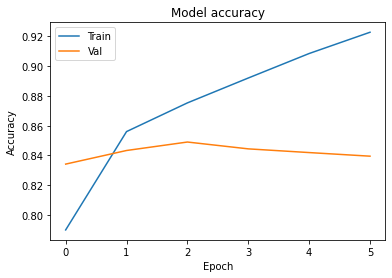

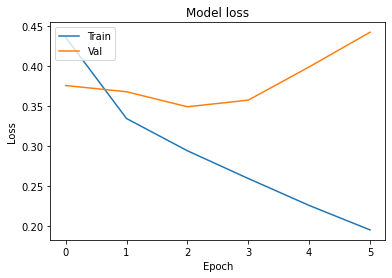

In [42]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## 모델2

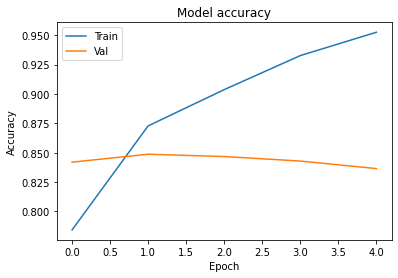

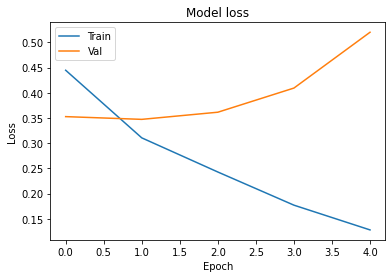

In [43]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## 모델3

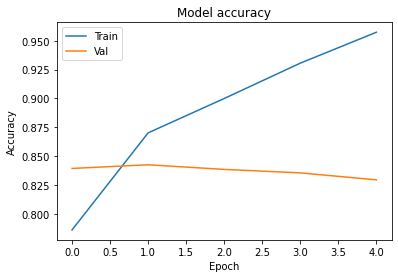

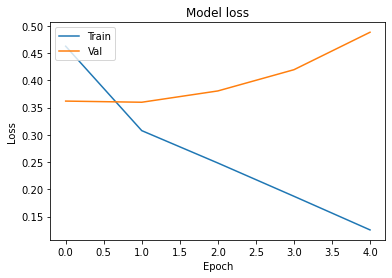

In [44]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

- 세가지 모델에 대하여 모두 1epoch 이후로 과적합이 발생하며 그 이후로 valid loss의 개선이 없어 학습이 종료됨.

# 7. 모델 테스트

## 모델1

In [45]:
test_loss, test_accuracy = model1.evaluate(x_test, y_test, verbose=2)
print("test_loss: {0} ".format(round(test_loss, 2)))
print("test_accuracy: {0}".format(round(test_accuracy, 2)))

1537/1537 - 6s - loss: 0.4369 - accuracy: 0.8394 - 6s/epoch - 4ms/step
test_loss: 0.44 
test_accuracy: 0.84


## 모델2

In [46]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test, verbose=2)
print("test_loss: {0} ".format(round(test_loss, 2)))
print("test_accuracy: {0}".format(round(test_accuracy, 2)))

1537/1537 - 3s - loss: 0.5136 - accuracy: 0.8382 - 3s/epoch - 2ms/step
test_loss: 0.51 
test_accuracy: 0.84


## 모델3

In [47]:
test_loss, test_accuracy = model3.evaluate(x_test, y_test, verbose=2)
print("test_loss: {0} ".format(round(test_loss, 2)))
print("test_accuracy: {0}".format(round(test_accuracy, 2)))

1537/1537 - 2s - loss: 0.4886 - accuracy: 0.8276 - 2s/epoch - 2ms/step
test_loss: 0.49 
test_accuracy: 0.83


- 세가지 모델 모두 테스트 결과 accuracy가 0.85를 넘지 못함.

# 8. 임베딩 레이어 분석

## 모델1

In [48]:
embedding_layer = model1.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 256)


In [49]:
embed_size = 256

In [50]:
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: '.', 4: '영화', 5: '다', 6: '고', 7: '하', 8: '을', 9: '보', 10: '..', 11: '게', 12: ',', 13: '!', 14: '지', 15: '있', 16: '없', 17: '?', 18: '좋', 19: '나', 20: '었', 21: '만', 22: '는데', 23: '너무', 24: '봤', 25: '적', 26: '안', 27: '정말', 28: '로', 29: '음', 30: '것', 31: '아', 32: '네요', 33: '재밌', 34: '어', 35: '같', 36: '점', 37: '지만', 38: '진짜', 39: '했', 40: '에서', 41: '기', 42: '네', 43: '않', 44: '거', 45: '았', 46: '수', 47: '되', 48: '면', 49: 'ㅋㅋ', 50: '말', 51: '연기', 52: '인', 53: '주', 54: '내', 55: '최고', 56: '~', 57: '평점', 58: '이런', 59: '던', 60: '어요', 61: '할', 62: '왜', 63: '겠', 64: '1', 65: '스토리', 66: '해', 67: '습니다', 68: 'ㅋㅋㅋ', 69: '...', 70: '드라마', 71: '생각', 72: '아니', 73: '더', 74: '그', 75: '싶', 76: '사람', 77: '듯', 78: '때', 79: '감동', 80: '함', 81: '배우', 82: '본', 83: '까지', 84: '뭐', 85: '알', 86: '만들', 87: '내용', 88: '볼', 89: '감독', 90: '보다', 91: '라', 92: '그냥', 93: '재미', 94: '시간', 95: '지루', 96: '중', 97: '재미있', 98: '년', 99: '10', 100: '였', 101: '잼', 102: '사랑', 103: '못', 104: '냐', 105

- index_to_word 생성

In [51]:
# 학습한 Embedding 파라미터를 파일에 써서 저장
word2vec_file_path = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/9강/data/word2vec.txt'    
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-3, embed_size))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 기록

# 단어 개수(에서 특수문자 3개는 제외하고)만큼의 워드 벡터를 파일에 기록
vectors = model1.get_weights()[0]
for i in range(3,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [60]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)

i = 0
for word, index in word_to_index.items():
    i += 1
    if i <= 100:
        continue
    elif i >= 120:
        break

    similarity = word_vectors.similar_by_word(word)
    print(f"{word} 단어의 유사 단어")
    print(similarity)
    print("\n")

였 단어의 유사 단어
[('봤으니', 0.5205553770065308), ('되돌아보', 0.5163918733596802), ('쇼크', 0.5085234642028809), ('바람직', 0.5083666443824768), ('손색', 0.507456362247467), ('넘겼', 0.5072858929634094), ('반했', 0.5027185678482056), ('호수', 0.5012159943580627), ('쫄깃', 0.4988924264907837), ('드러난', 0.4969916045665741)]


잼 단어의 유사 단어
[('재미있', 0.7496222257614136), ('팅', 0.7399768233299255), ('재밌', 0.7292214632034302), ('친근', 0.7262083292007446), ('닿', 0.7181054949760437), ('즐겼', 0.7151950001716614), ('정점', 0.7151949405670166), ('기승전결', 0.7139891386032104), ('뚜', 0.7110755443572998), ('구원', 0.7108758687973022)]


사랑 단어의 유사 단어
[('여신', 0.7005850076675415), ('굿', 0.6987819671630859), ('여운', 0.6889519691467285), ('top', 0.6763949990272522), ('명작', 0.6730713248252869), ('최고', 0.6724359393119812), ('도박', 0.66802978515625), ('스러울', 0.6679869890213013), ('진하', 0.6668049693107605), ('구입', 0.6666976809501648)]


못 단어의 유사 단어
[('촌스럽', 0.7160378694534302), ('노', 0.715531587600708), ('엉성', 0.7083867788314819), ('지루', 0.708239

- 수치상으로는 유사도를 표현하였으나 실제 사람이 느끼기에 단어 사이의 유사성이 거의 느껴지지 않음.
- 모델이 인간의 언어를 학습하기에는 너무 단순하여 임베딩 벡터가 실제 단어 간 유사도를 띄지 않음.
- 임베딩 벡터가 실제 언어적 성격을 띄기 위해서는 주어진 모델과 입력 데이터 타겟 데이터가 실제 문장에 가까워야 한다고 생각함.
- 하지만 이번 문제에서는 단순한 모델, 문장이라기보단 문법이 파괴된 단어들을 나열한 리뷰, 문장이 아니라 0/1로 표현되는 타겟 등 모델이 한국어를 학습할 수 있는 조건이 아니었음.
- 나중에 모델과 데이터를 실제 언어를 학습할만큼의 복잡도로 구성하여 다시 임베딩 벡터가 실제 언어적 유사도를 가지는지 확인할 예정.